Training data shape: (60000, 28, 28), (60000,)
Test data shape: (10000, 28, 28), (10000,)


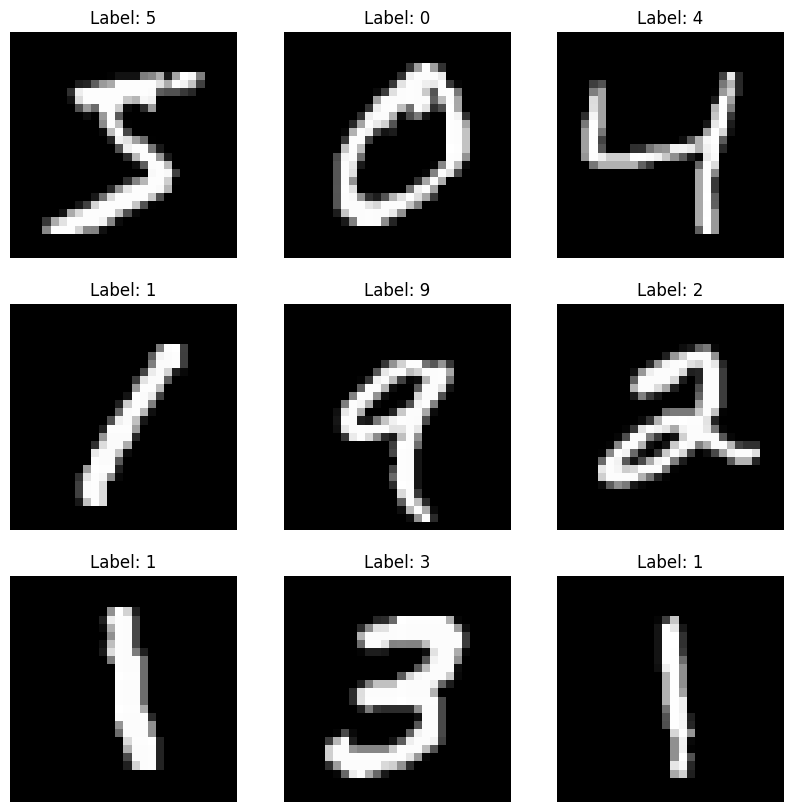

In [35]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Test data shape: {x_test.shape}, {y_test.shape}")

# Visualize some samples from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [26]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(28, 28)),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/home/aqr/Desktop/DeepLearning/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/aqr/Desktop/DeepLearning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.compile(
#     optimizer=keras.optimizers.SGD(learning_rate=0.001),
#     loss=keras.losses.SparseCategoricalCrossentropy(),
#     metrics=['accuracy']
# )

In [28]:
fit_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.15)

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8224 - loss: 0.6805 - val_accuracy: 0.9116 - val_loss: 0.3204
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9096 - loss: 0.3166 - val_accuracy: 0.9293 - val_loss: 0.2554
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2623 - val_accuracy: 0.9377 - val_loss: 0.2181
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9348 - loss: 0.2263 - val_accuracy: 0.9449 - val_loss: 0.1930
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9430 - loss: 0.1985 - val_accuracy: 0.9526 - val_loss: 0.1712
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1775 - val_accuracy: 0.9544 - val_loss: 0.1568
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9541 - loss: 0.1599 - val_accuracy: 0.9588 - val_loss: 0.1457
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9584 - loss: 0.1456 - 

In [29]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.9634 - loss: 0.1281


[0.12814506888389587, 0.9634000062942505]

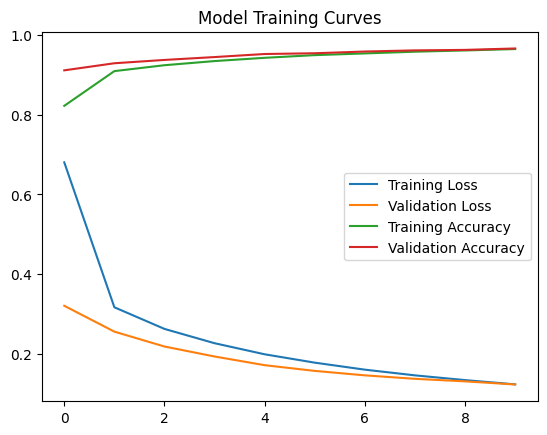

In [30]:
plt.plot(fit_history.history['loss'], label='Training Loss')
plt.plot(fit_history.history['val_loss'], label='Validation Loss')
plt.plot(fit_history.history['accuracy'], label='Training Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Curves')
plt.legend()
plt.show()

In [40]:
predictions = model.predict(x_test[:6], verbose=0).round(2)
print(predictions, end='\n\n')
print("Prediction Indexes per row (0 to 6):",np.argmax(predictions, axis=-1))

[[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.98 0.   0.   0.   0.   0.02]
 [0.   0.99 0.   0.   0.   0.   0.   0.01 0.   0.  ]]

Prediction Indexes per row (0 to 6): [7 2 1 0 4 1]
